In [ ]:
ASSIGNMENT

In [1]:
"""
OUTLINE

1) Import of data
2) Data cleaning
3) Office building indicator
4) Merging Dataframes
5) Obtaining aggregated data
6) Data labeling
7) Training data preparation for the use of a classifier
8) Aplication of DecisionTreeClassifier
9) Visualization of errors
"""

'\nBizMachine CASE STUDY - OUTLINE\n\n1) Import of data\n2) Data cleaning\n3) Office building indicator\n4) Merging Dataframes\n5) Obtaining aggregated data\n6) Data labeling\n7) Training data preparation for the use of a classifier\n8) Aplication of DecisionTreeClassifier\n9) Visualization of errors\n'

In [2]:
import pandas as pd

In [3]:
"""
1. STEP: Import of the data into dataframes
"""

'\n1. STEP: Import of the data into dataframes\n'

In [4]:
# Import csv files with particular parameters

df_address_building = pd.read_csv("static/AddressBuilding.csv", sep=';')
df_address_company = pd.read_csv("static/AddressCompany.csv", sep=';')
df_company = pd.read_csv("static/Company.csv", sep=';', index_col=0)

In [5]:
# Display the shape and the sample of imported dataframe

print(df_address_building.shape)
df_address_building.sample(3)

(650, 11)


,AddressCode,AddressText,ObjectCode,CompletedAt,UsageCode,UsageLabel,Area,FloorCount,FlatCount,ElevatorCode,ElevatorLabel
68,22354964,"Nekvasilova 589/5, Praha, 18600",22217495,NaN,6,bytový dům,NaN,NaN,123.0,NaN,NaN
438,22351710,"Pobřežní 299/8, Praha, 18600",22214798,NaN,5,objekt občanské vybavenosti,NaN,1.0,0.0,9.0,Nezjištěno
374,22354891,"Molákova 582/22, Praha, 18600",22217410,NaN,6,bytový dům,NaN,NaN,36.0,NaN,NaN


In [6]:
# Display the shape and the sample of imported dataframe

print(df_address_company.shape)
df_address_company.sample(3)

(13653, 5)


,AddressCode,Latitude,Longitude,CompanyIN,IsHq
6471,26653036,"50,09430054","14,44771569",28369319,1
8836,22351825,"50,0894764","14,4455165",67755755,1
5111,22354816,"50,0964393","14,46548775",43018530,1


In [7]:
# Display the shape and the sample of imported dataframe

print(df_company.shape)
df_company.sample(3)

(13642, 8)


,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection
CompanyIN,,,,,,,,
28189264,112.0,Společnost s r.o.,25.0,98.0,52290,[52290] Ostatní vedlejší činnosti v dopravě,H,[H] Doprava a skladování
8048452,112.0,Společnost s r.o.,NaN,NaN,731,[731] Reklamní činnosti,M,"[M] Profesní, vědecké a technické činnosti"
3648851,112.0,Společnost s r.o.,1.0,46.0,74,"[74] Ostatní profesní, vědecké a technické čin...",M,"[M] Profesní, vědecké a technické činnosti"


In [8]:
"""
2. STEP: Data cleaning
df_address_building
"""

'\n2. STEP: Data cleaning\ndf_address_building\n'

In [9]:
# Identify missing values - NaN  
df_address_building.isna().sum()

AddressCode        0
AddressText        0
ObjectCode         0
CompletedAt      550
UsageCode          0
UsageLabel         0
Area             568
FloorCount        75
FlatCount          2
ElevatorCode      72
ElevatorLabel     72
dtype: int64

In [10]:
# Display counts of valid data
df_address_building.count()

AddressCode      650
AddressText      650
ObjectCode       650
CompletedAt      100
UsageCode        650
UsageLabel       650
Area              82
FloorCount       575
FlatCount        648
ElevatorCode     578
ElevatorLabel    578
dtype: int64

In [11]:
# Remove the rows where is no information about counts of floors and flats or an elevator
# The removal will result in 13,3 % row reduction which seems to me as acceptable

df_address_building = df_address_building.dropna(subset=["FloorCount", "FlatCount", "ElevatorCode"])

In [12]:
df_address_building.count()

AddressCode      563
AddressText      563
ObjectCode       563
CompletedAt       86
UsageCode        563
UsageLabel       563
Area              71
FloorCount       563
FlatCount        563
ElevatorCode     563
ElevatorLabel    563
dtype: int64

In [13]:
# Remove colums which are populated by data only on 15 % of all rows

df_address_building = df_address_building.drop(columns=['CompletedAt', 'Area'])

In [14]:
df_address_building.count()

AddressCode      563
AddressText      563
ObjectCode       563
UsageCode        563
UsageLabel       563
FloorCount       563
FlatCount        563
ElevatorCode     563
ElevatorLabel    563
dtype: int64

In [15]:
"""
2. STEP: Data cleaning
df_address_company
"""

'\n2. STEP: Data cleaning\ndf_address_company\n'

In [16]:
# Identify the NaN values
df_address_company.isna().sum()

# OBSERVATION: no NaN values identified in df_address_company thus no data cleaning needed

AddressCode    0
Latitude       0
Longitude      0
CompanyIN      0
IsHq           0
dtype: int64

In [17]:
"""
2. STEP: Data cleaning
df_company
"""

'\n2. STEP: Data cleaning\ndf_company\n'

In [18]:
# Identify the NaN values

df_company.isna().sum()

LegalFormID             38
LegalFormName           38
EmployeeLowerBound    8020
ActivityScore         7463
NaceCode               240
Nace                   240
NaceSectionCode        240
NaceSection            240
dtype: int64

In [19]:
# Valid data count

df_company.count()

LegalFormID           13604
LegalFormName         13604
EmployeeLowerBound     5622
ActivityScore          6179
NaceCode              13402
Nace                  13402
NaceSectionCode       13402
NaceSection           13402
dtype: int64

In [20]:
# The removal of rows with NaN values in columns EmployeeLowerBound and ActivityScore
# would shrink the dataframe to the 25 % of its original size
# which seems to me as too much...

# The removal of rows with NaN values ONLY in columns EmployeeLowerBound
# would shrink the dataframe to the 41 % of its original size
# which seems acceptable for the puropse of this case study.

# Knowledge of the EmployeeLowerBound is an important factor which can help a lot in order to determinate
# whether the building is office building or not.


# If it were real task I would suggest to A/B test both options and compare the obtained results
# or try to come up with something else - better :)


df_company = df_company.dropna(subset=["EmployeeLowerBound"])
df_company.count()

LegalFormID           5618
LegalFormName         5618
EmployeeLowerBound    5622
ActivityScore         3523
NaceCode              5564
Nace                  5564
NaceSectionCode       5564
NaceSection           5564
dtype: int64

In [21]:
"""
3. STEP: Office building indicator - ideas behind hypothesis


What data determines an office building?

Hint1 suggests to use numbers and sizes of companies residing on a particular Address Code
so I can use the sum of companies on a particular Address Code and EmployeeLowerBound (=sizes) 
as components of the "Office Building Indicator"

I also can hardly imagine to have an office building without elevator.
Another good component of the indicator could be FlatCount = 0.

"""

'\n3. STEP: Office building indicator - ideas behind hypothesis\n\n\nWhat data determines an office building?\n\nYour Hint1 suggests to use numbers and sizes of companies residing on a particular Address Code\nso I can use the sum of companies on a particular Address Code and EmployeeLowerBound (=sizes) \nas components of the "Office Building Indicator"\n\nI also can hardly imagine to have an office building without elevator.\nAnother good component of the indicator could be FlatCount = 0.\n\n'

In [22]:
"""
3. STEP: Office building indicator 
- hypothesis


Office building is a building where:

resides multiple companies
which have higher EmployeeLowerBound
is equipped with an elevator 
and ideally have zero flatCount.
"""

'\n3. STEP: Office building indicator \n- hypothesis\n\n\nOffice building is a building where:\n\nresides multiple companies\nwhich have higher EmployeeLowerBound,\nis equipped with an elevator \nand ideally have zero flatCount.\n\n'

In [23]:
"""
3. STEP: Office building indicator - components
Number of companies which resides on Address Code

==> will be obtained by aggregation function
"""

'\n3. STEP: Office building indicator - components\nNumber of companies which resides on Address Code\n\n==> will be obtained by aggregation function\n'

In [24]:
"""
3. STEP: Office building indicator - components
EmployeeLowerBound
"""

# Check the suitability of the data type

df_company.dtypes

# ===> The column EmployeeLowerBound has a propriet datatype (float64) for a further processing

LegalFormID           float64
LegalFormName          object
EmployeeLowerBound    float64
ActivityScore         float64
NaceCode               object
Nace                   object
NaceSectionCode        object
NaceSection            object
dtype: object

In [25]:
"""
3. STEP: Office building indicator - components
ElevatorCode=1.0 (=> ElevatorLabel "s výtahem")
"""

# Check the suitability of the data type
df_address_building.dtypes

AddressCode        int64
AddressText       object
ObjectCode         int64
UsageCode          int64
UsageLabel        object
FloorCount       float64
FlatCount        float64
ElevatorCode     float64
ElevatorLabel     object
dtype: object

In [26]:
#  Check of a suitability of a data type

df_address_building[df_address_building['ElevatorLabel']=='Nezjištěno'].count()

# Not sure about this but I drop rows where ElevatorCode = 9.0 (=ElevatorLabel=Nezjištěno)
# However this results in loosing another 59 rows

AddressCode      59
AddressText      59
ObjectCode       59
UsageCode        59
UsageLabel       59
FloorCount       59
FlatCount        59
ElevatorCode     59
ElevatorLabel    59
dtype: int64

In [27]:
# Remove rows that don't have information about the elevator

df_address_building = df_address_building[df_address_building.ElevatorLabel != 'Nezjištěno']

In [28]:
df_address_building.count()

AddressCode      504
AddressText      504
ObjectCode       504
UsageCode        504
UsageLabel       504
FloorCount       504
FlatCount        504
ElevatorCode     504
ElevatorLabel    504
dtype: int64

In [29]:
"""
3. STEP: Office building indicator - components
FlatCount=0
"""

'\n3. STEP: Office building indicator - components\nFlatCount=0\n'

In [30]:
df_address_building[df_address_building['FlatCount']==0].count()

AddressCode      86
AddressText      86
ObjectCode       86
UsageCode        86
UsageLabel       86
FloorCount       86
FlatCount        86
ElevatorCode     86
ElevatorLabel    86
dtype: int64

In [31]:
"""
3. STEP: Office building indicator - components
UsageCode = 14 (=> UsageLagel "stavba pro administrativu")
"""

'\n3. STEP: Office building indicator - components\nUsageCode = 14 (=> UsageLagel "stavba pro administrativu")\n'

In [32]:
"""
3. STEP: Office building indicator - components
OVERVIEW

Office building indicator is made by 5 criteria:
Number of residing companies >= 10
EmployeeLowerBound >= 10
ElevatorCode = 1.0
FlatCount = 0
UsageCode = 14 (=> UsageLagel "stavba pro administrativu")
"""

'\n3. STEP: Office building indicator - components\nOVERVIEW\n\nOffice building indicator is made by 5 criteria:\nNumber of residing companies >= 10\nEmployeeLowerBound >= 10\nElevatorCode = 1.0\nFlatCount = 0\nUsageCode = 14 (=> UsageLagel "stavba pro administrativu")\n'

In [33]:
"""
4. STEP: Merging dataframes
"""

'\n4. STEP: Merging dataframes\n'

In [34]:
df_company_merged = df_address_company
df_company_merged = df_company_merged.merge(df_company, how='inner', on='CompanyIN', right_index=True)
df_company_merged.sample(3)

,AddressCode,Latitude,Longitude,CompanyIN,IsHq,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection
4626,22352961,"50,09530178","14,45776356",27903371,1,112.0,Společnost s r.o.,1.0,82.0,56100,"[56100] Stravování v restauracích, u stánků a ...",I,"[I] Ubytování, stravování a pohostinství"
11040,26703408,"50,09372794","14,45050328",66029741,1,101.0,Fyz. os. podnikající dle živ. zákona,1.0,83.0,257,"[257] Výroba nožířských výrobků, nástrojů a že...",C,[C] Zpracovatelský průmysl
11903,22352864,"50,09478358","14,45847964",27623939,1,112.0,Společnost s r.o.,1.0,NaN,74300,[74300] Překladatelské a tlumočnické činnosti,M,"[M] Profesní, vědecké a technické činnosti"


In [35]:
df_final_merge = df_address_building.merge(df_company_merged, how='left', on='AddressCode')
df_final_merge.sample(3)

,AddressCode,AddressText,ObjectCode,UsageCode,UsageLabel,FloorCount,FlatCount,ElevatorCode,ElevatorLabel,Latitude,...,CompanyIN,IsHq,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection
3254,40315355,"U Sluncové 666/12a, Praha, 18600",50624539,6,bytový dům,24.0,26.0,1.0,S výtahem,"50,0981153",...,7420994.0,1.0,117.0,Nadace,1.0,56.0,9499,[9499] Činnosti ost. organizací za účelem pros...,S,[S] Ostatní činnosti
3377,22349324,"Pobřežní 80/38, Praha, 18600",22212761,3,objekt k bydlení,1.0,7.0,2.0,Bez výtahu,"50,09378701",...,71721495.0,0.0,101.0,Fyz. os. podnikající dle živ. zákona,0.0,56.0,73110,[73110] Činnosti reklamních agentur,M,"[M] Profesní, vědecké a technické činnosti"
1358,22352317,"Pobřežní 370/4, Praha, 18600",22215352,5,objekt občanské vybavenosti,1.0,0.0,2.0,Bez výtahu,"50,09202853",...,24301698.0,1.0,421.0,Odšt.záv.zahr.práv.os.,1.0,81.0,18200,[18200] Rozmnožování nahraných nosičů,C,[C] Zpracovatelský průmysl


In [36]:
# Check whether no rows have got lost during merging

""" CONTROL CHECK"""
print(df_address_building.shape,'=', df_final_merge['AddressCode'].nunique())

(504, 9) = 504


In [37]:
"""
5. STEP: Obtaining aggregated data
"""

'\n5. STEP: Obtaining aggregated data\n'

In [38]:
# Sum the companies on a particular Address Code

companies_on_address_code_sum = df_final_merge.groupby('AddressCode').size()

In [39]:
# Add a new column CompanySum to the df_address_building

df_companies_on_address_code_sum = companies_on_address_code_sum.to_frame()

df_address_building_complete = df_address_building.merge(df_companies_on_address_code_sum, how='left', on='AddressCode')
df_address_building_complete=df_address_building_complete.rename(columns={0: 'CompanySum'})
df_address_building_complete.sample(3)

,AddressCode,AddressText,ObjectCode,UsageCode,UsageLabel,FloorCount,FlatCount,ElevatorCode,ElevatorLabel,CompanySum
442,22349871,"Sokolovská 129/50, Praha, 18600",22213244,6,bytový dům,1.0,3.0,2.0,Bez výtahu,9
217,22352635,"Karlínské náměstí 399/11, Praha, 18600",22215611,3,objekt k bydlení,1.0,14.0,2.0,Bez výtahu,10
78,22349367,"Thámova 84/23, Praha, 18600",22212809,3,objekt k bydlení,2.0,26.0,1.0,S výtahem,10


In [40]:
# The sum of employees lower bounds for a particular Address Code

df_employee_lower_bound_sum = df_final_merge.groupby('AddressCode').agg({'EmployeeLowerBound': 'sum'})

In [41]:
# Adding a new column CompanySum to the df_address_building

df_address_building_complete = df_address_building_complete.merge(df_employee_lower_bound_sum, how='left', on='AddressCode')
#df_address_building_complete.rename(columns={0: 'EmployeeSum'})
df_address_building_complete.sample(3)

,AddressCode,AddressText,ObjectCode,UsageCode,UsageLabel,FloorCount,FlatCount,ElevatorCode,ElevatorLabel,CompanySum,EmployeeLowerBound
389,22350756,"Křižíkova 208/55, Praha, 18600",22213961,3,objekt k bydlení,1.0,7.0,2.0,Bez výtahu,8,25.0
271,22352244,"Pernerova 357/22, Praha, 18600",22215271,3,objekt k bydlení,1.0,11.0,2.0,Bez výtahu,2,1.0
237,22354760,"Nekvasilova 569/25, Praha, 18600",22217274,6,bytový dům,1.0,32.0,1.0,S výtahem,4,0.0


In [42]:
"""
6) Data labeling
"""

'\n6) Data labeling\n'

In [43]:
list_of_indicators = []
list_of_labels = []

for index, row in df_address_building_complete.iterrows():
    indicator = 0
    if row['UsageCode'] == 14:
        indicator = indicator + 0.2
    if row['FlatCount'] == 0.0:
        indicator = indicator + 0.2
    if row['ElevatorCode'] == 1.0:
        indicator = indicator + 0.2
    if row['CompanySum'] > 5:
        indicator = indicator + 0.2
    if row['EmployeeLowerBound'] > 5:
        indicator = indicator + 0.2
    if indicator > 0.5:
        list_of_labels.append(True)
    else:
        list_of_labels.append(False)    
    list_of_indicators.append(indicator)

# Assign the list of indicators to the dataframe
df_address_building_complete['Indicator'] = list_of_indicators
df_address_building_complete['OfficeBuilding'] = list_of_labels


"""CONTINUOS CHECK"""
print("Check whether no rows have got lost:",len(list_of_indicators), df_address_building_complete.shape)

KONTROLA, ZDA NEDOŠLO KE ZTRÁTĚ DAT: 504 (504, 13)


In [44]:
# Display the sample of results for the further observation
# manual check - visualize the building on maps.google.com in the street view mode :)

df_address_building_complete.sample(3)

,AddressCode,AddressText,ObjectCode,UsageCode,UsageLabel,FloorCount,FlatCount,ElevatorCode,ElevatorLabel,CompanySum,EmployeeLowerBound,Indicator,OfficeBuilding
445,22350179,"Křižíkova 153/41, Praha, 18600",22213457,3,objekt k bydlení,1.0,6.0,2.0,Bez výtahu,1,25.0,0.2,False
282,22354115,"Lyčkovo náměstí 514/5, Praha, 18600",22216758,3,objekt k bydlení,1.0,11.0,2.0,Bez výtahu,1,0.0,0.0,False
141,22350870,"Křižíkova 220/91, Praha, 18600",22214071,6,bytový dům,1.0,9.0,1.0,S výtahem,6,1.0,0.4,False


In [45]:
"""
7) Training data preparation for the use of classifier
"""

'\n7) Training data preparation for the use of classifier\n'

In [46]:
# Remove the columns that are not descriptive

df_for_classifier = df_address_building_complete.drop(columns=['AddressText','ObjectCode', 'UsageCode', 'UsageLabel','ElevatorLabel', 'Indicator'])
df_for_classifier.shape

(504, 7)

In [47]:
# Remove nonsense values
# EmployeeLowerBound > 5000

emp_list = df_for_classifier['EmployeeLowerBound'].tolist()
emp_list.sort()
emp_list

emp_error_values_list = [5001.0,5024.0,5053.0,5101.0,5451.0,5853.0,7553.0,7925.0,10000.0, 10001.0,14946.0,20000.0,20400.0,30001.0, 30130.0,31802.0]

df_for_classifier = df_for_classifier[~df_for_classifier['EmployeeLowerBound'].isin(emp_error_values_list)]
df_for_classifier.shape

(485, 7)

In [48]:
"""
8) Aplication of DecisionTreeClassifier
"""

'\n8) Aplication of DecisionTreeClassifier\n'

In [49]:
y = df_for_classifier['OfficeBuilding']==True
y.astype(int)
y

0       True
1       True
2      False
3       True
4      False
       ...  
498     True
499     True
501     True
502     True
503     True
Name: OfficeBuilding, Length: 485, dtype: bool

In [50]:
X = df_for_classifier.drop(columns=["AddressCode", "OfficeBuilding"])

In [51]:
# Import classifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [52]:
# Split data into test set and train set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [53]:
# Fit classifier and conduct prediction
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [54]:
print("DefinedLabel:  Prediction:")
for true, predicted in zip(y_test, prediction):
    print(f"{true:<15}  {predicted:<10} {'OK' if true == predicted else 'X'}")

print(f"Sum of errors: {sum(y_test != prediction)}")
print(f"Success Rate: {100*sum(y_test == prediction)/len(y_test):.2f} %")

DefinedLabel:  Prediction:
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
1                1          OK
0                0          OK
1                1          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
1                1          OK
0                0          OK
0                0          OK
0                0          OK
0           

In [55]:
"""
9) Visualization of errors
"""

'\n9) Visualization of errors\n'

In [56]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

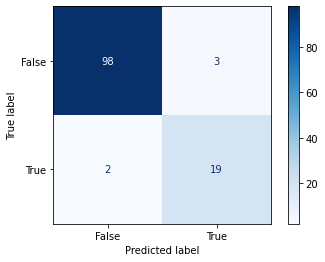

In [57]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);